# Лабораторная работа № 2
Выполнил: Мирпулатов Исломбек Пулат-угли

ВМК - 608

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [51]:
N = 64
R_ON = 25 * 1e3
R_OFF = 25 * 1e4
MU_V = 1e-14
V_P = 1.5
V_N = -1
D = 20 * 1e-9
R_INT = 1e3
C_INT = 45 * 1e-6
V_TE_PLUS = 2.5
V_TE_MINUS = -1.6
V_TE_0 = 2 * 1e-2
V_OUT_PLUS = 2
V_TH = 1e-3
DT = 1e-5
V_INT = 0.
TAU_R = 2 * 1e-2
TAU_S = 1e-3
TAU_OUT = 1e-2
TAU = 1e-3 + TAU_OUT

In [52]:
template1 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 2, 0, 0, 0, 2, 0,
    0, 2, 0, 2, 0, 0, 2, 0,
    0, 2, 0, 0, 2, 0, 2, 0,
    0, 2, 0, 0, 0, 2, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 0, 0, 0, 0, 0, 0, 0
])

template2 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 2, 0, 0, 2, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 2, 0, 0, 2, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 0, 0, 0, 0, 0, 0, 0
])

template3 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 0, 0, 0, 0, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 0, 0, 0, 0, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 0, 0, 0, 0, 0, 0, 0
])

template4 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 0, 2, 2, 0, 2, 0,
    0, 2, 2, 2, 2, 2, 2, 0,
    0, 0, 0, 0, 0, 0, 0, 0
])

x = np.random.uniform(0, 1, N)

In [53]:
def get_v_te(tau):
    if tau <= TAU_S:
        return V_TE_PLUS
    elif TAU_S < tau <= TAU_R / 2:
        return 0
    elif TAU_R / 2 < tau <= TAU_R / 2 + TAU_S:
        return V_TE_MINUS
    elif TAU_R / 2  + TAU_S < tau <= TAU_R:
        return 0
    elif TAU_R < tau:
        return V_TE_0

In [54]:
def get_v_out(tau):
    if tau <= TAU_OUT:
        return V_OUT_PLUS
    elif TAU_OUT < tau:
        return 0

In [55]:
def get_f_r(x):
    return R_ON * x + R_OFF * (1 - x)

In [56]:
def get_f_x(i, v, x):
    if v >= V_P:
        return MU_V * (V_P / (D ** 2)) * np.exp(R_ON * i / V_P) 
    elif v <= V_N:
        return MU_V * (V_N / (D ** 2)) * np.exp(R_ON * i / V_N)
    elif V_N < v < V_P:
        return (MU_V * R_ON) * i / (D ** 2)

In [57]:
def solver(v_g, v_int, x, tau):
    R_s = 0.0

    for i in range(N):
        if v_g[i] > 0:
            R = get_f_r(x[i])
            x[i] = x[i] + get_f_x((get_v_te(tau) - v_int) / R, get_v_te(tau) - v_int, x[i]) * DT
            if x[i] < 0:
                x[i] = 0.0
            elif x[i] > 1:
                x[i] = 1.
            R_s += 1. / R

    v_te = get_v_te(tau)

    v_int = v_int + (
    (
      max(min(V_TE_0, get_v_te(tau)), 0.0) - v_int) * R_s - v_int / R_INT
    ) / C_INT * DT
    
    v_out = get_v_out(tau)
    tau += DT

    if v_int > V_TH:
        tau = 0.0
        v_int = 0.0

    return v_int, x, tau, v_te, v_out

# Template 1

2min 25s

CPU times: user 2min 25s, sys: 669 ms, total: 2min 25s
Wall time: 2min 18s


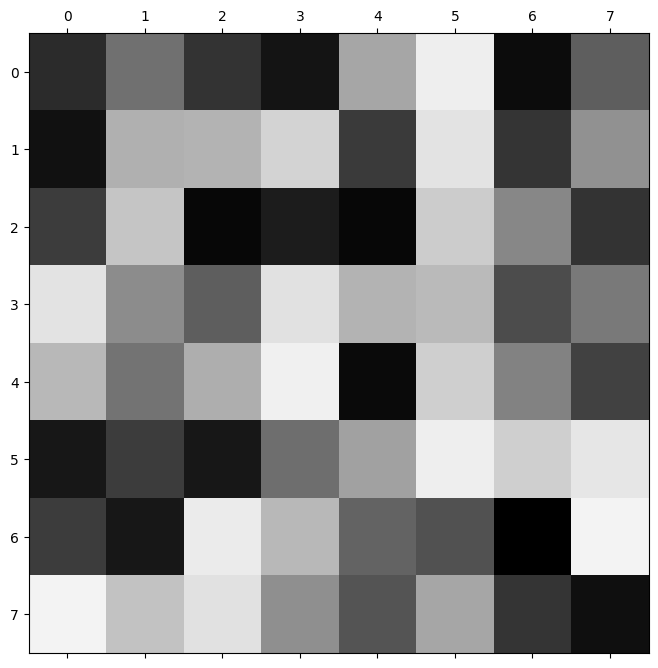

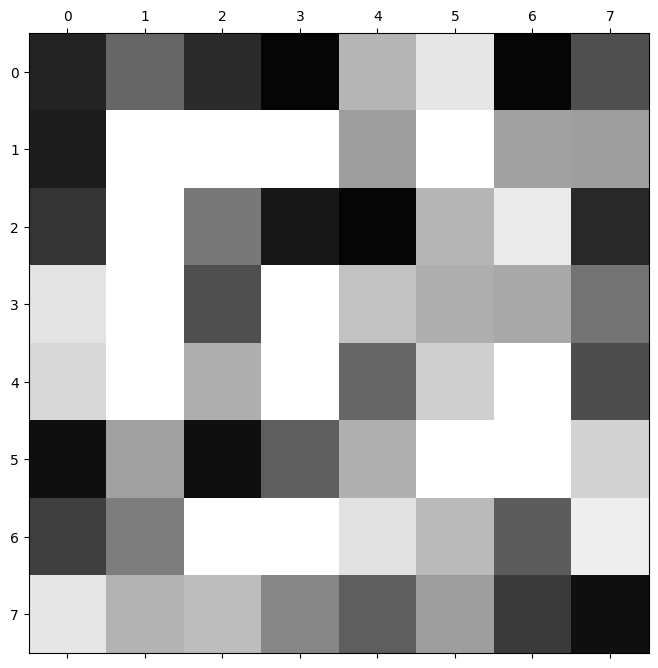

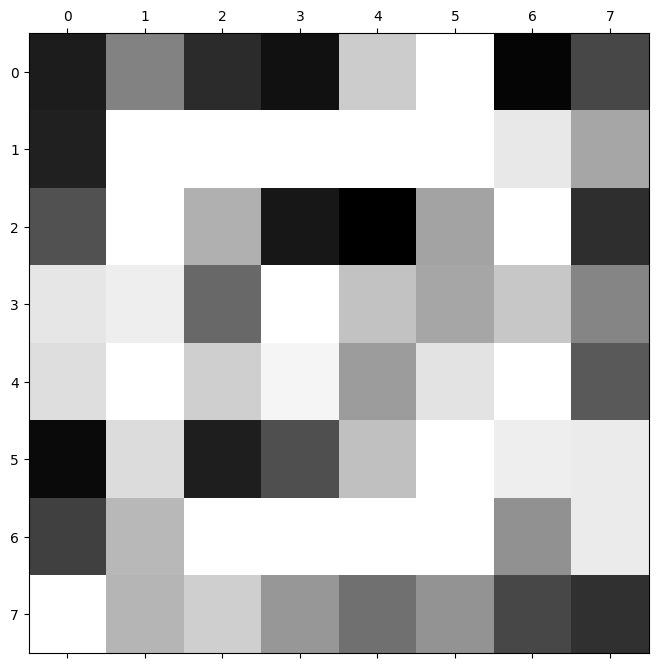

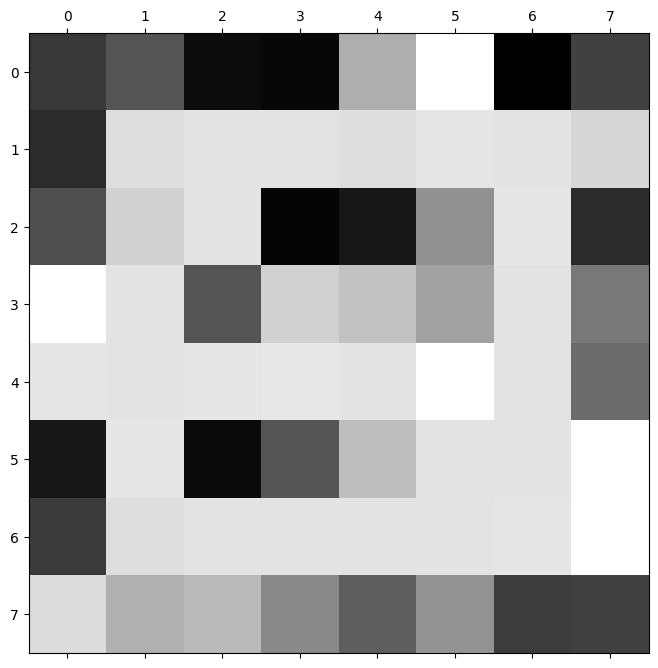

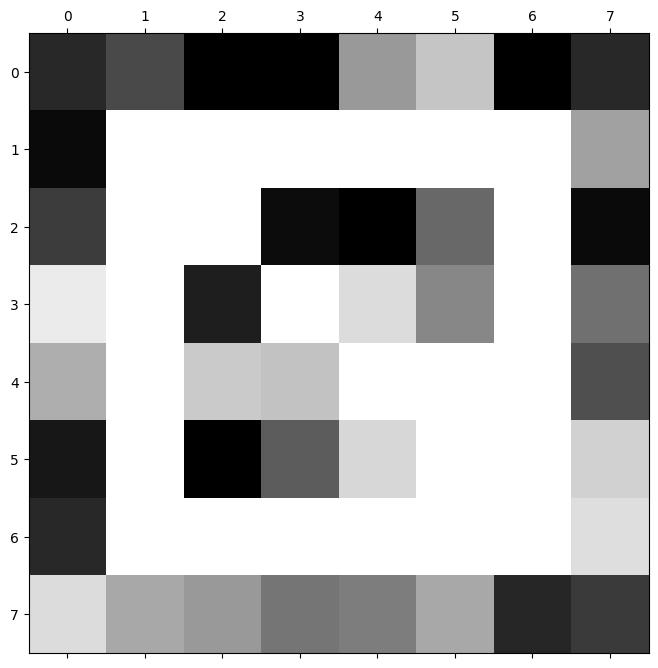

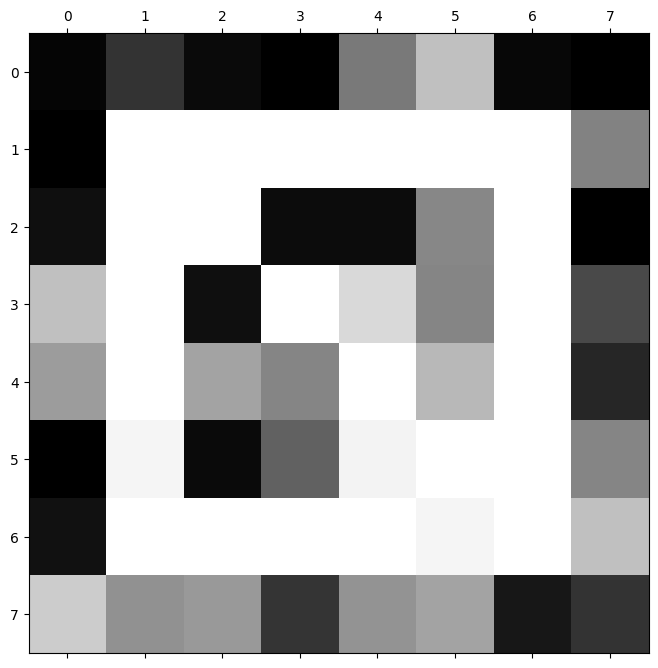

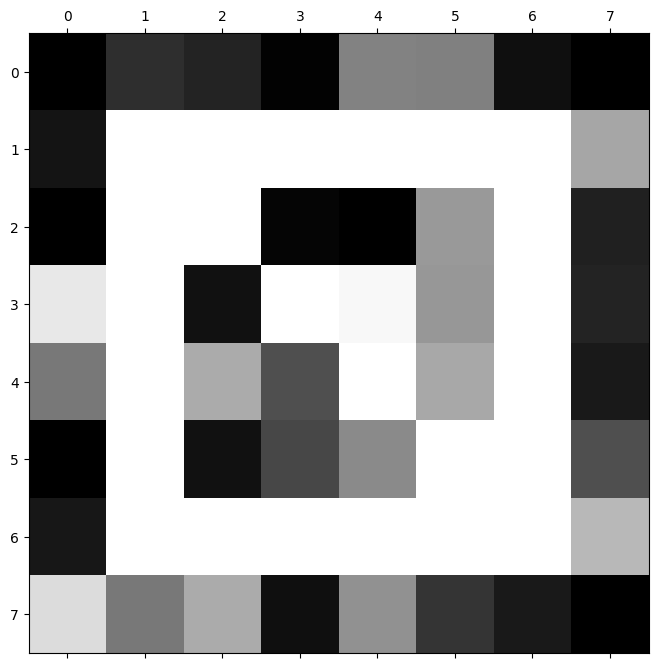

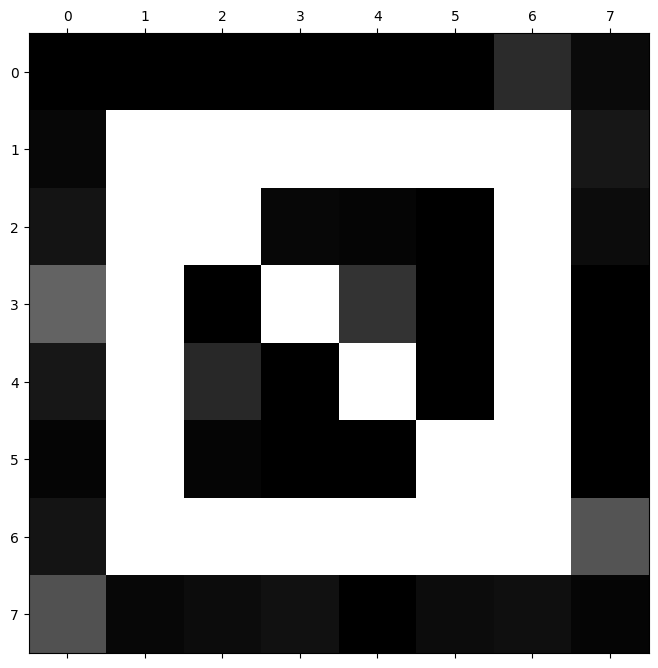

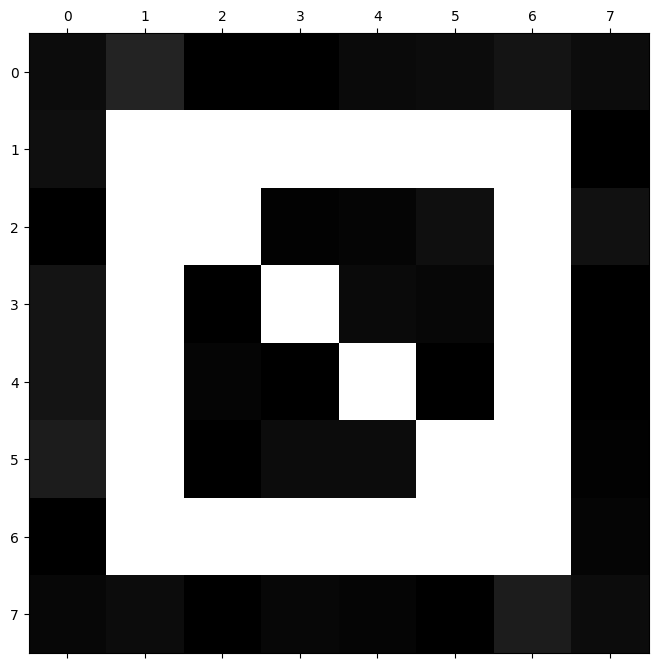

In [10]:
%%time
EPOCHS = 5051
t = 0

_v_out = []
_v_te = []
_tau = []
_epochs = []
_t = []
_v_int = []
_data = []

for i in range(EPOCHS):
    draw = np.random.choice([0, 2], 64,
              p=[0.875, 0.125])
    if np.random.choice([0, 1]) == 0:
        data = template1
        _data.append(1)
    else:
        data = draw
        _data.append(-1)
    while t <= 1e-2 * (i + 1):
        V_INT, x, TAU, V_te_tmp, V_out_tmp = solver(data, V_INT, x, TAU)
        t += DT

    _v_int.append(V_INT * 2000)
    _v_out.append(V_out_tmp)
    _v_te.append(V_te_tmp)
    _tau.append(TAU)
    _epochs.append(i)
    _t.append(t)

    if i in [0, 50, 100, 200, 400, 800, 1600, 3500, 5050]:
        test = np.round(x, 2)
        plt.matshow(test.reshape(-1, 8), cmap='gray', vmin=0, vmax=1)
        plt.savefig(f'template1/epoch-{i}.png', dpi=200)

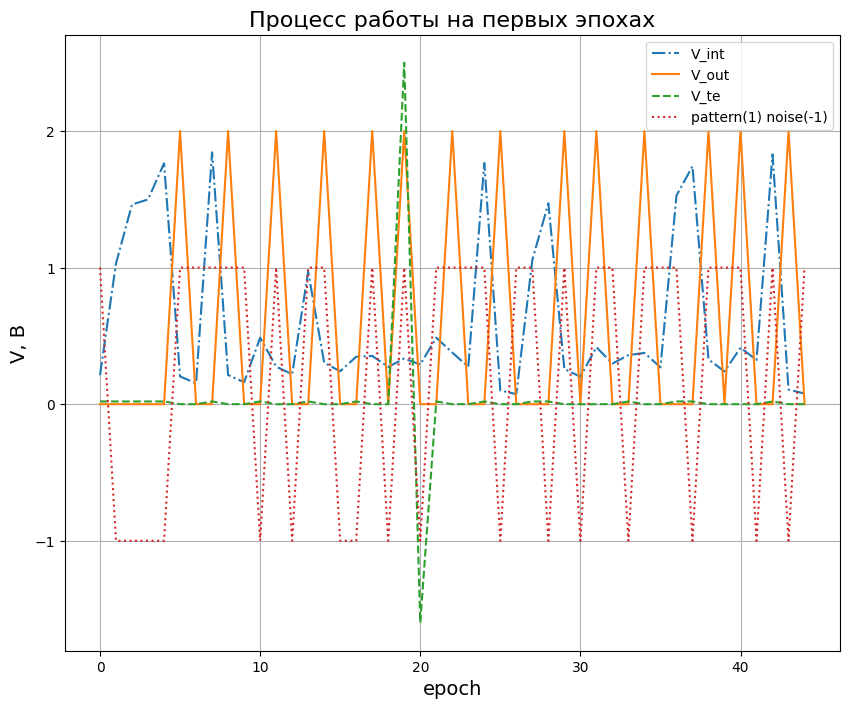

In [11]:
plt.plot(_epochs[:45], _v_int[:45], '-.')
plt.plot(_epochs[:45], _v_out[:45], '-')
plt.plot(_epochs[:45], _v_te[:45], '--')
plt.plot(_epochs[:45], _data[:45], ':')
plt.title('Процесс работы на первых эпохах', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template1/train_0_45.png', dpi=200)

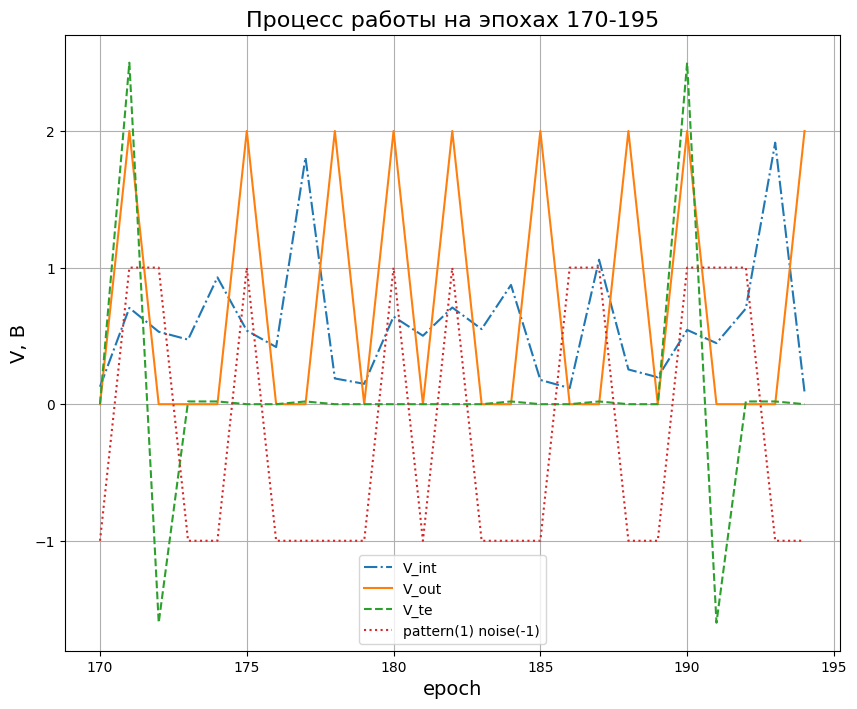

In [12]:
plt.plot(_epochs[170:195], _v_int[170:195], '-.')
plt.plot(_epochs[170:195], _v_out[170:195], '-')
plt.plot(_epochs[170:195], _v_te[170:195], '--')
plt.plot(_epochs[170:195], _data[170:195], ':')
plt.title('Процесс работы на эпохах 170-195', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template1/train_170_195.png', dpi=200)

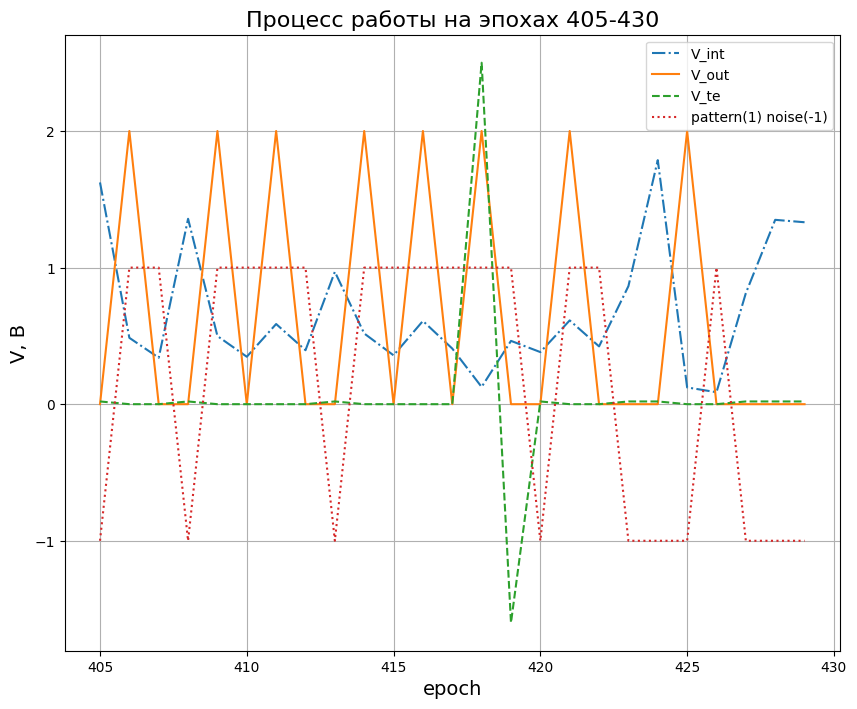

In [13]:
plt.plot(_epochs[405:430], _v_int[405:430], '-.')
plt.plot(_epochs[405:430], _v_out[405:430], '-')
plt.plot(_epochs[405:430], _v_te[405:430], '--')
plt.plot(_epochs[405:430], _data[405:430], ':')
plt.title('Процесс работы на эпохах 405-430', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template1/train_405_430.png', dpi=200)

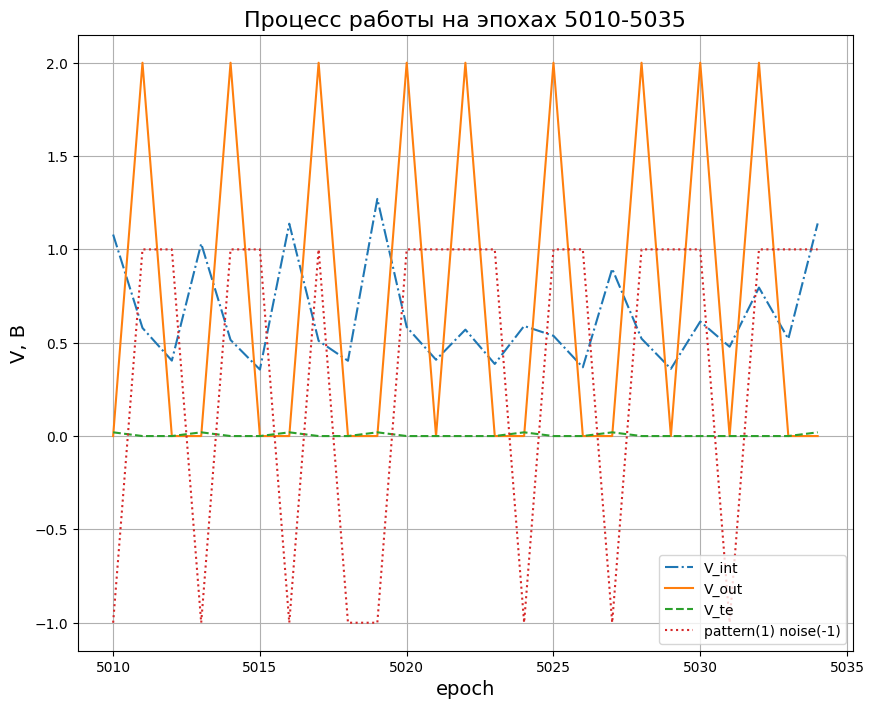

In [14]:
plt.plot(_epochs[5010:5035], _v_int[5010:5035], '-.')
plt.plot(_epochs[5010:5035], _v_out[5010:5035], '-')
plt.plot(_epochs[5010:5035], _v_te[5010:5035], '--')
plt.plot(_epochs[5010:5035], _data[5010:5035], ':')
plt.title('Процесс работы на эпохах 5010-5035', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template1/train_5010_5035.png', dpi=200)

# Template 2

2min 39s

CPU times: user 2min 41s, sys: 823 ms, total: 2min 42s
Wall time: 2min 34s


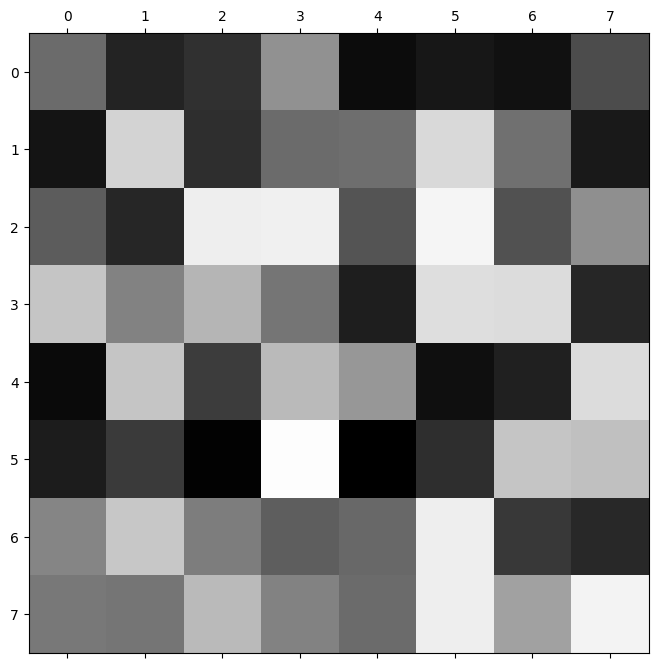

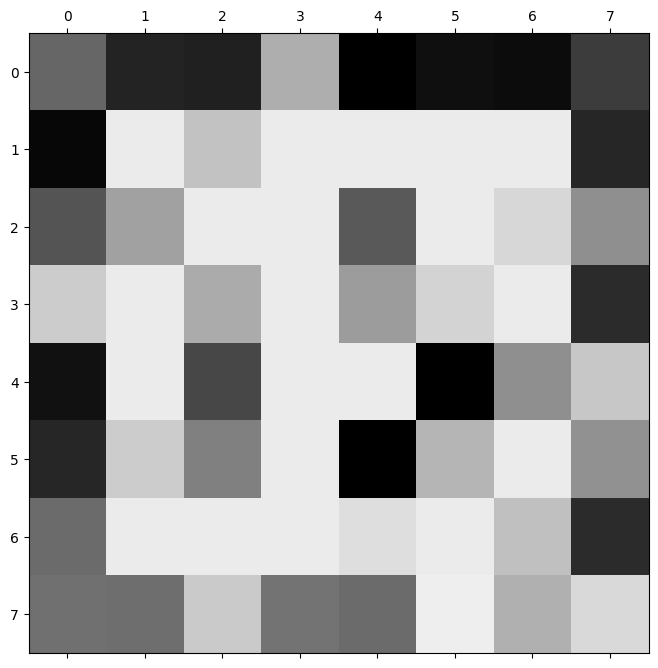

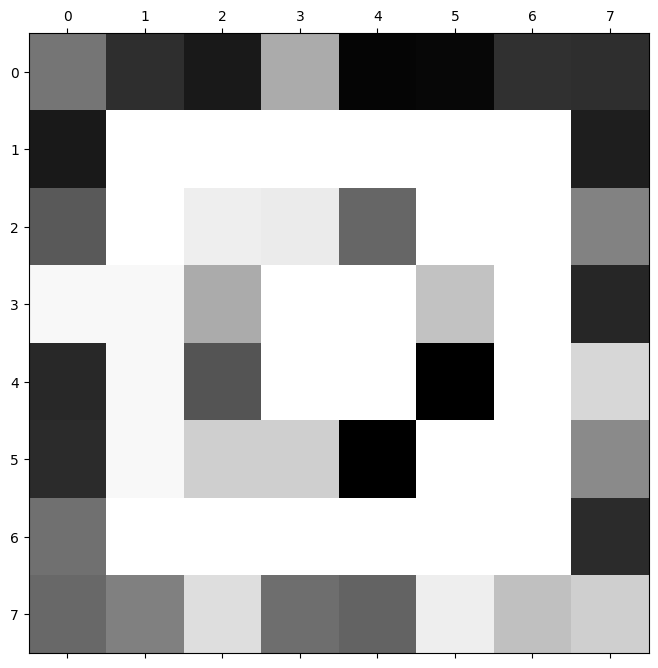

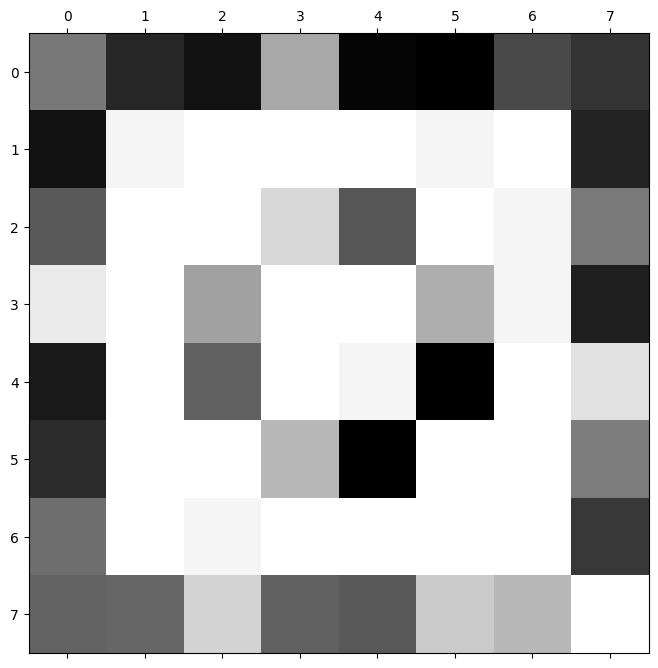

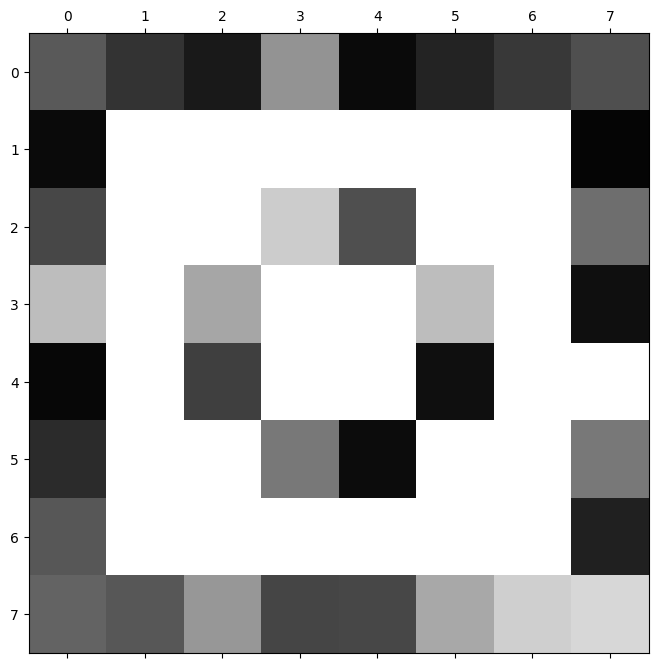

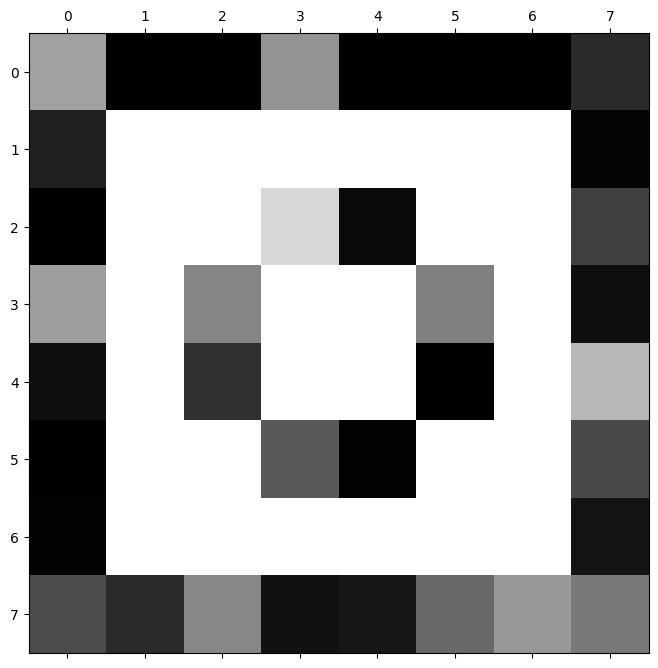

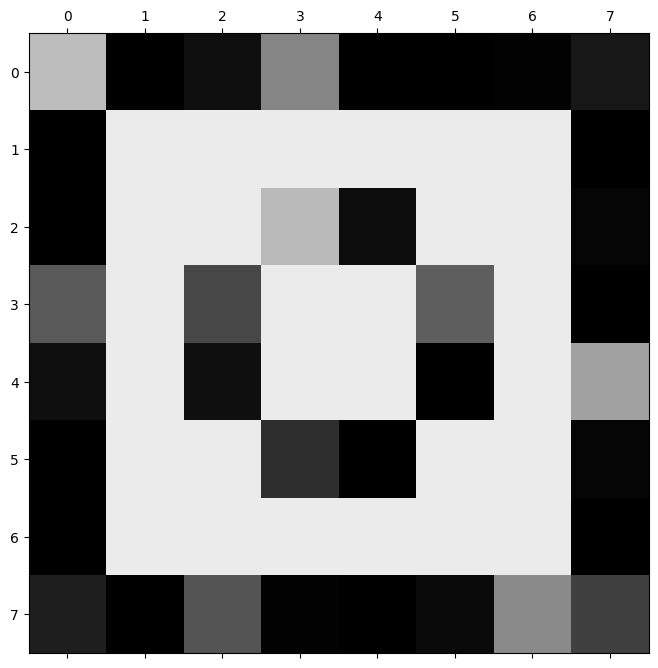

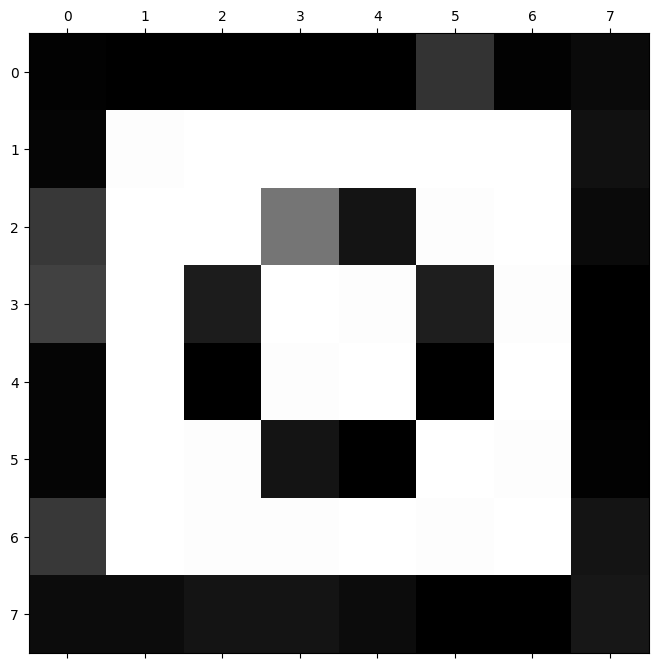

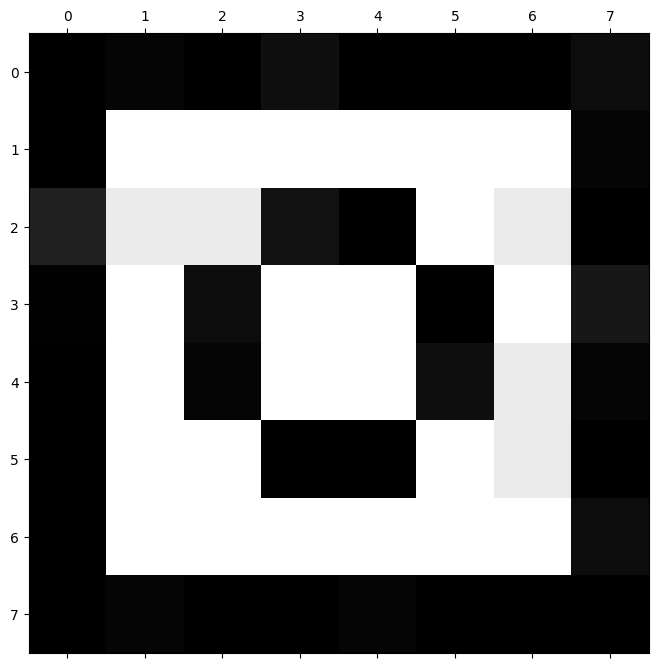

In [22]:
%%time
EPOCHS = 5051
t = 0

_v_out = []
_v_te = []
_tau = []
_epochs = []
_t = []
_v_int = []
_data = []

for i in range(EPOCHS):
    draw = np.random.choice([0, 2], 64,
              p=[0.875, 0.125])
    if np.random.choice([0, 1]) == 0:
        data = template2
        _data.append(1)
    else:
        data = draw
        _data.append(-1)
    while t <= 1e-2 * (i + 1):
        V_INT, x, TAU, V_te_tmp, V_out_tmp = solver(data, V_INT, x, TAU)
        t += DT

    _v_int.append(V_INT * 2000)
    _v_out.append(V_out_tmp)
    _v_te.append(V_te_tmp)
    _tau.append(TAU)
    _epochs.append(i)
    _t.append(t)

    if i in [0, 50, 100, 200, 400, 800, 1600, 3500, 5050]:
        test = np.round(x, 2)
        plt.matshow(test.reshape(-1, 8), cmap='gray', vmin=0, vmax=1)
        plt.savefig(f'template2/epoch-{i}.png', dpi=200)

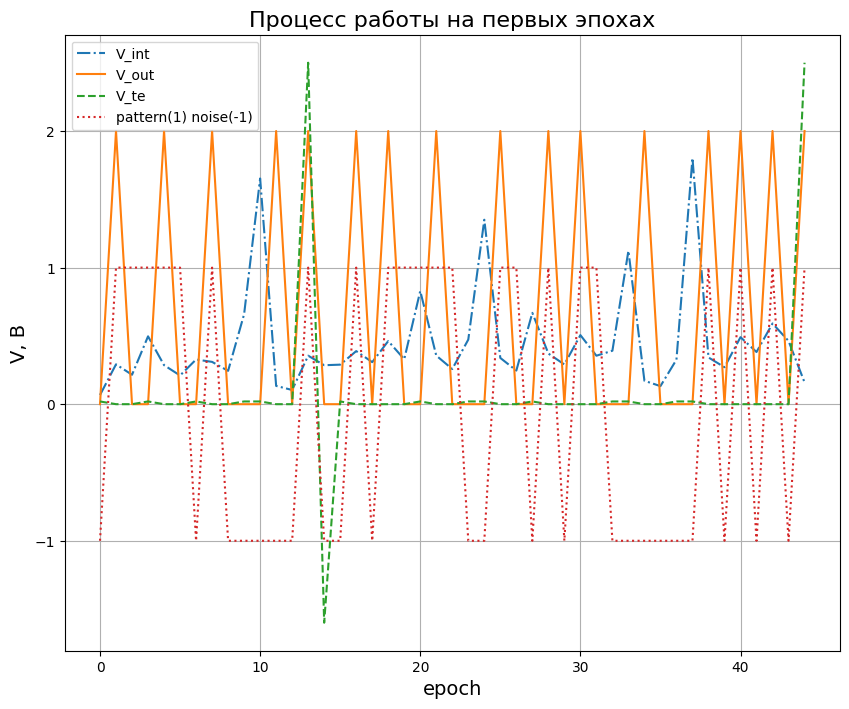

In [23]:
plt.plot(_epochs[:45], _v_int[:45], '-.')
plt.plot(_epochs[:45], _v_out[:45], '-')
plt.plot(_epochs[:45], _v_te[:45], '--')
plt.plot(_epochs[:45], _data[:45], ':')
plt.title('Процесс работы на первых эпохах', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template2/train_0_45.png', dpi=200)

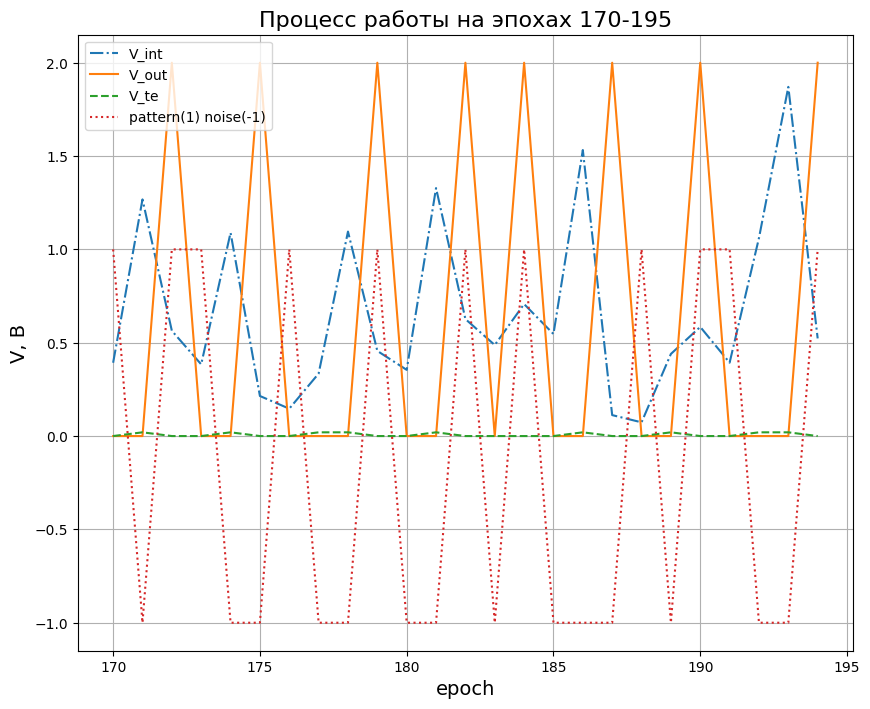

In [24]:
plt.plot(_epochs[170:195], _v_int[170:195], '-.')
plt.plot(_epochs[170:195], _v_out[170:195], '-')
plt.plot(_epochs[170:195], _v_te[170:195], '--')
plt.plot(_epochs[170:195], _data[170:195], ':')
plt.title('Процесс работы на эпохах 170-195', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template2/train_170_195.png', dpi=200)

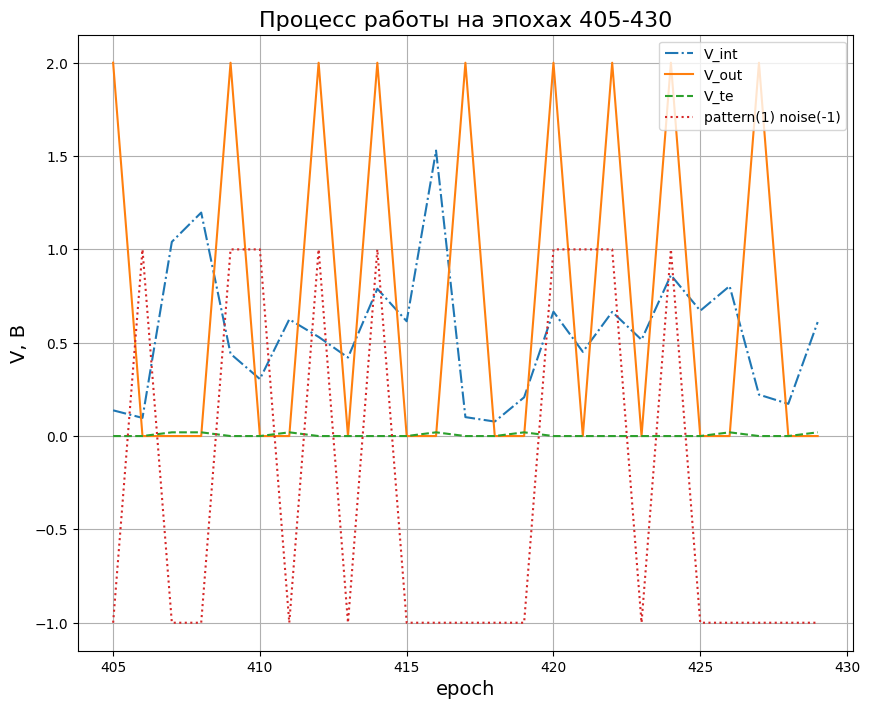

In [25]:
plt.plot(_epochs[405:430], _v_int[405:430], '-.')
plt.plot(_epochs[405:430], _v_out[405:430], '-')
plt.plot(_epochs[405:430], _v_te[405:430], '--')
plt.plot(_epochs[405:430], _data[405:430], ':')
plt.title('Процесс работы на эпохах 405-430', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template2/train_405_430.png', dpi=200)

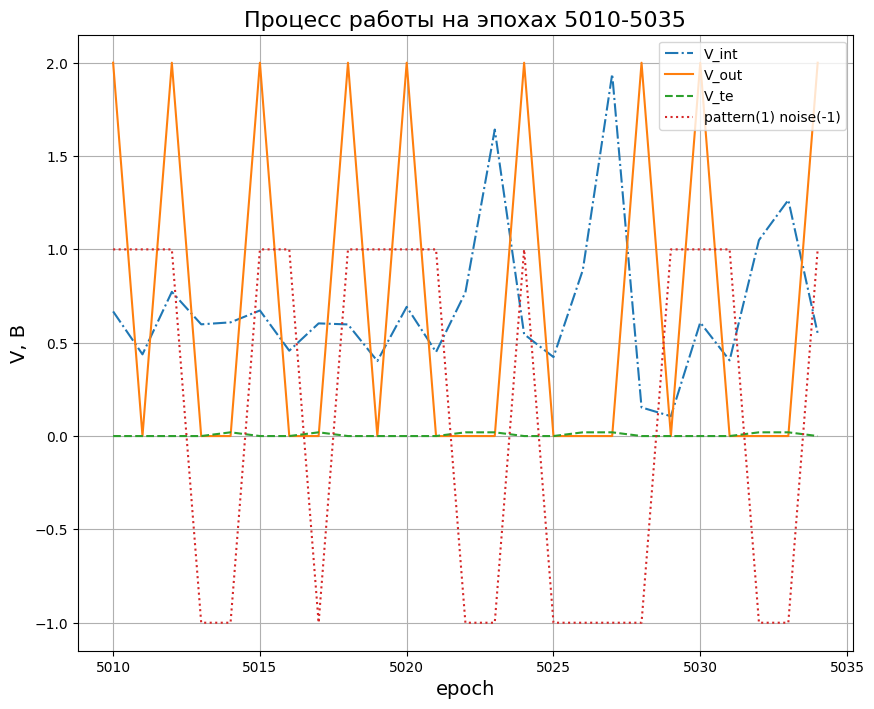

In [26]:
plt.plot(_epochs[5010:5035], _v_int[5010:5035], '-.')
plt.plot(_epochs[5010:5035], _v_out[5010:5035], '-')
plt.plot(_epochs[5010:5035], _v_te[5010:5035], '--')
plt.plot(_epochs[5010:5035], _data[5010:5035], ':')
plt.title('Процесс работы на эпохах 5010-5035', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template2/train_5010_5035.png', dpi=200)

# Template 3

2min 11s

CPU times: user 2min 36s, sys: 514 ms, total: 2min 37s
Wall time: 2min 29s


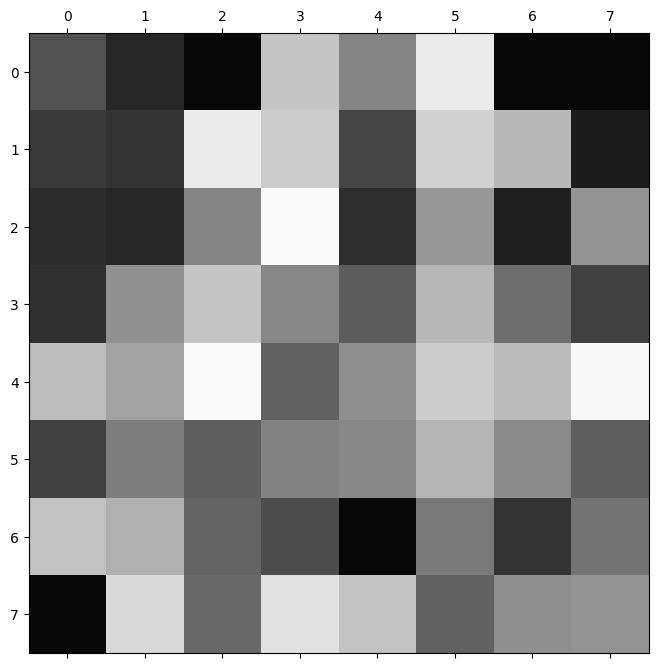

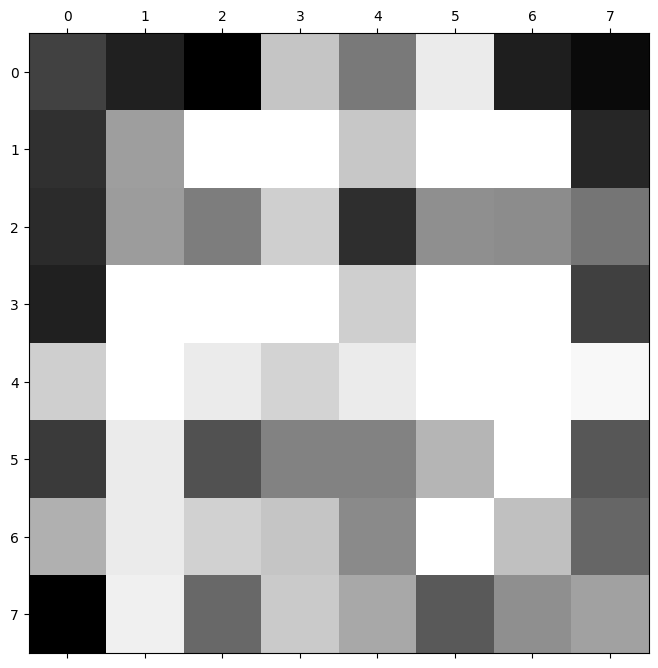

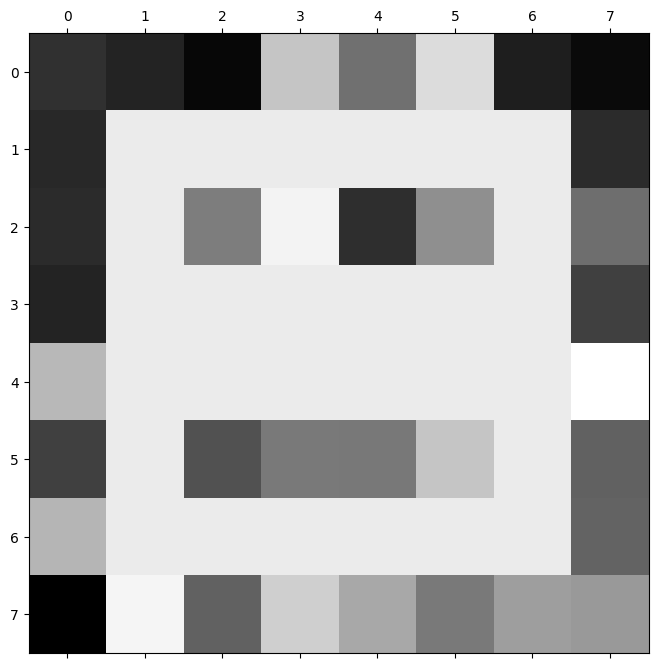

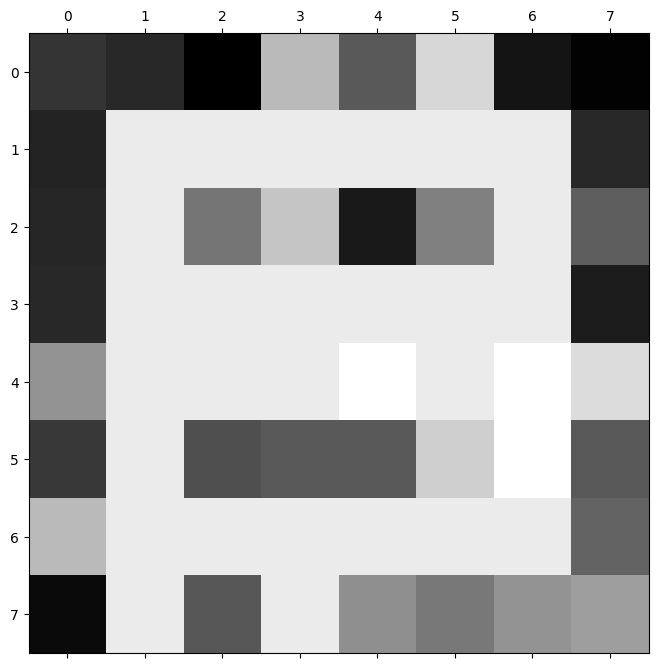

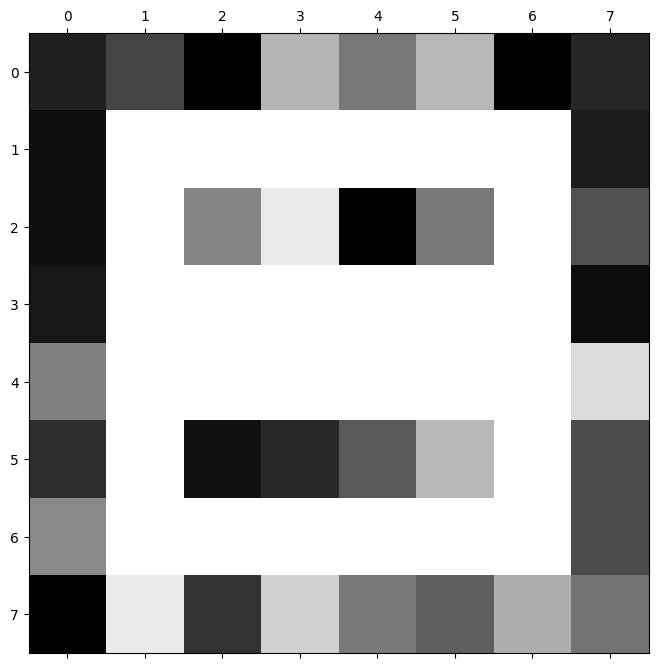

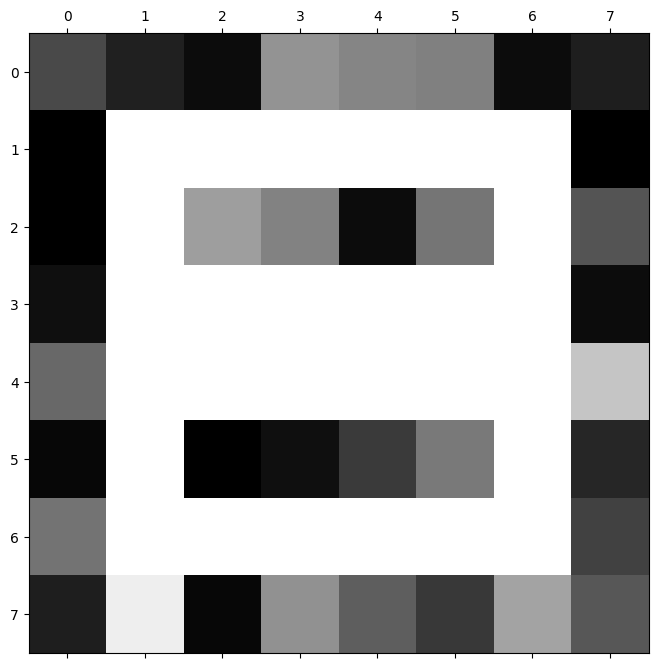

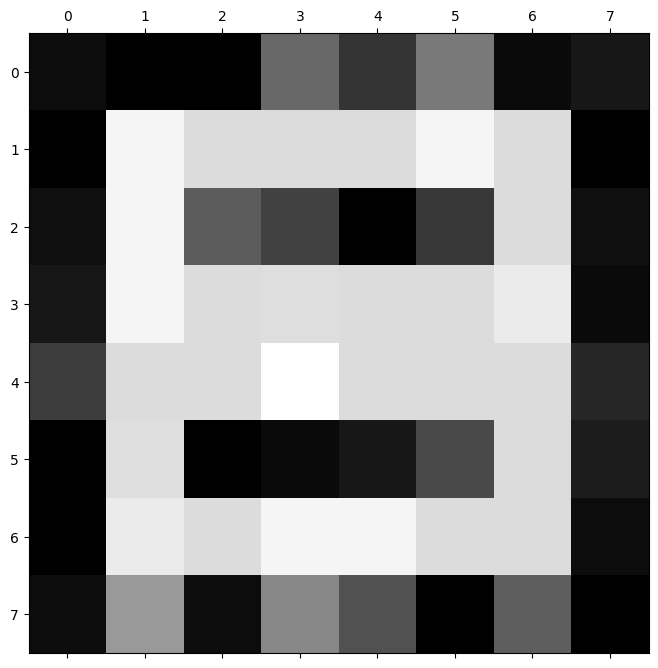

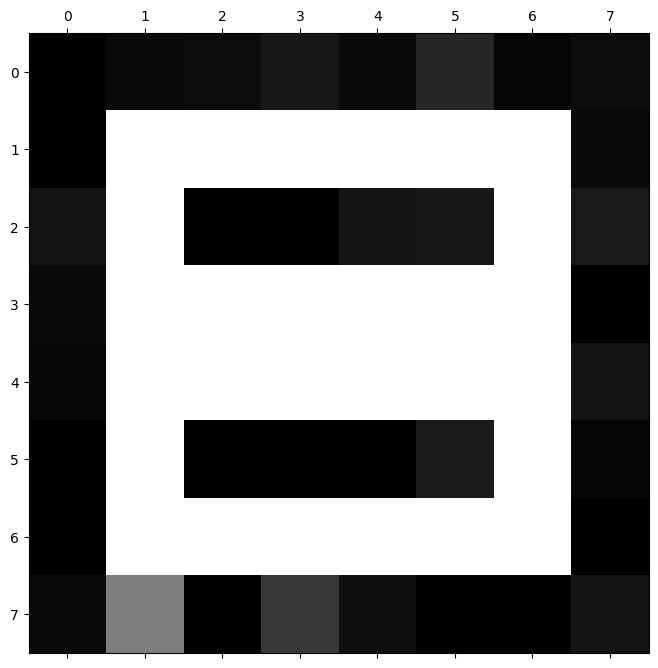

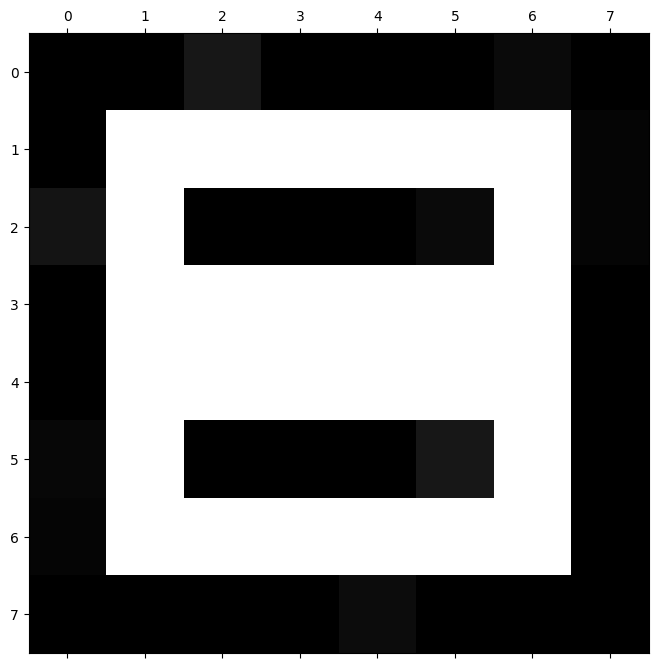

In [34]:
%%time
EPOCHS = 5051
t = 0

_v_out = []
_v_te = []
_tau = []
_epochs = []
_t = []
_v_int = []
_data = []

for i in range(EPOCHS):
    draw = np.random.choice([0, 2], 64,
              p=[0.875, 0.125])
    if np.random.choice([0, 1]) == 0:
        data = template3
        _data.append(1)
    else:
        data = draw
        _data.append(-1)
    while t <= 1e-2 * (i + 1):
        V_INT, x, TAU, V_te_tmp, V_out_tmp = solver(data, V_INT, x, TAU)
        t += DT

    _v_int.append(V_INT * 2000)
    _v_out.append(V_out_tmp)
    _v_te.append(V_te_tmp)
    _tau.append(TAU)
    _epochs.append(i)
    _t.append(t)

    if i in [0, 50, 100, 200, 400, 800, 1600, 3500, 5050]:
        test = np.round(x, 2)
        plt.matshow(test.reshape(-1, 8), cmap='gray', vmin=0, vmax=1)
        plt.savefig(f'template3/epoch-{i}.png', dpi=200)

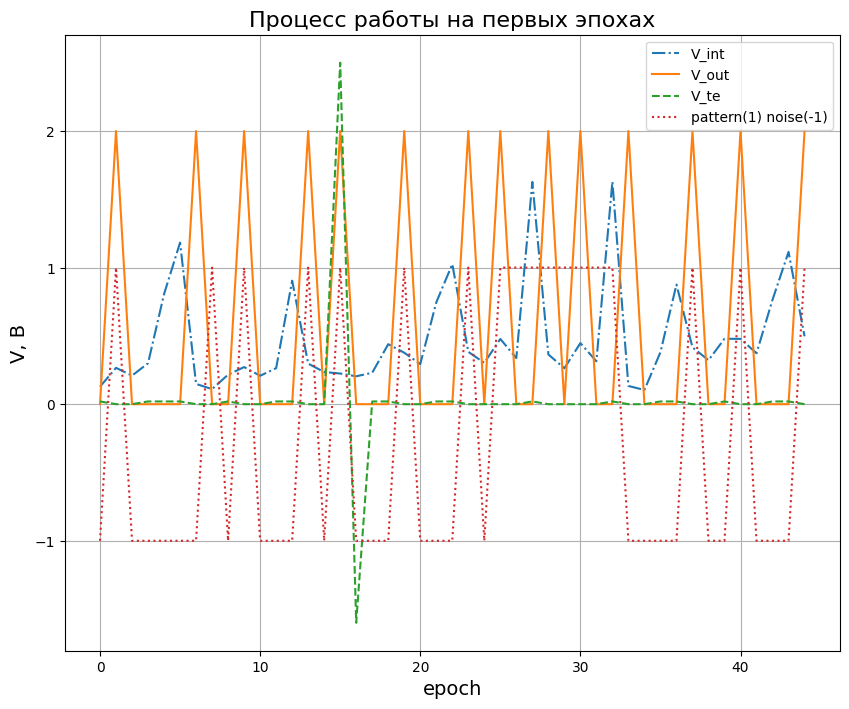

In [35]:
plt.plot(_epochs[:45], _v_int[:45], '-.')
plt.plot(_epochs[:45], _v_out[:45], '-')
plt.plot(_epochs[:45], _v_te[:45], '--')
plt.plot(_epochs[:45], _data[:45], ':')
plt.title('Процесс работы на первых эпохах', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template3/train_0_45.png', dpi=200)

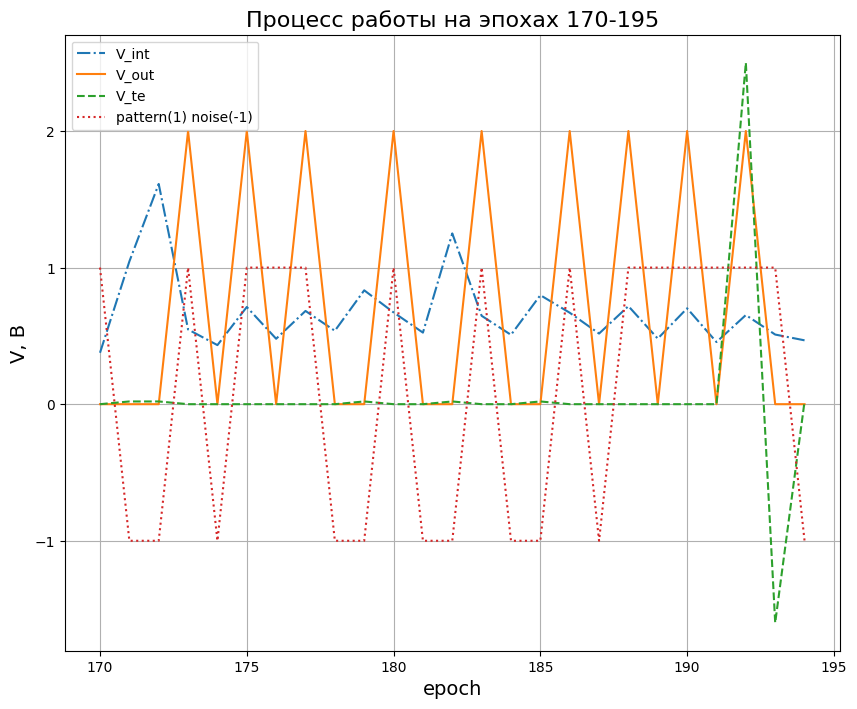

In [36]:
plt.plot(_epochs[170:195], _v_int[170:195], '-.')
plt.plot(_epochs[170:195], _v_out[170:195], '-')
plt.plot(_epochs[170:195], _v_te[170:195], '--')
plt.plot(_epochs[170:195], _data[170:195], ':')
plt.title('Процесс работы на эпохах 170-195', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template3/train_170_195.png', dpi=200)

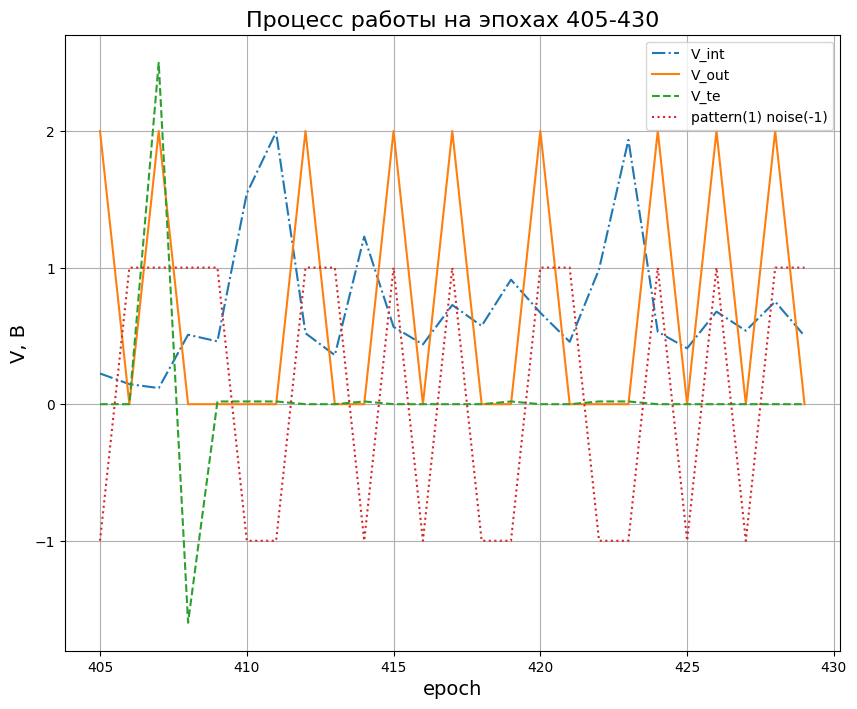

In [37]:
plt.plot(_epochs[405:430], _v_int[405:430], '-.')
plt.plot(_epochs[405:430], _v_out[405:430], '-')
plt.plot(_epochs[405:430], _v_te[405:430], '--')
plt.plot(_epochs[405:430], _data[405:430], ':')
plt.title('Процесс работы на эпохах 405-430', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template3/train_405_430.png', dpi=200)

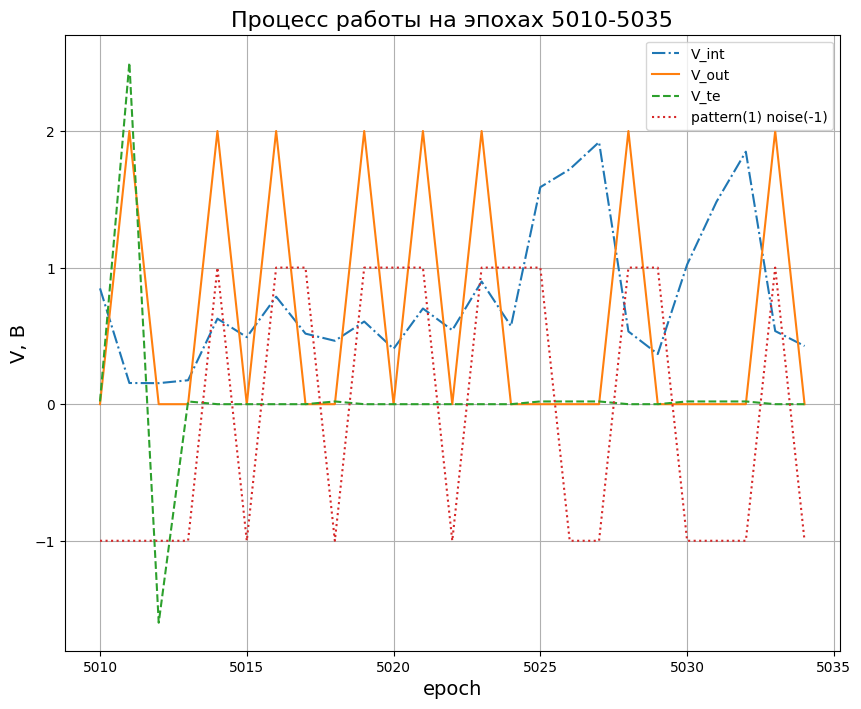

In [38]:
plt.plot(_epochs[5010:5035], _v_int[5010:5035], '-.')
plt.plot(_epochs[5010:5035], _v_out[5010:5035], '-')
plt.plot(_epochs[5010:5035], _v_te[5010:5035], '--')
plt.plot(_epochs[5010:5035], _data[5010:5035], ':')
plt.title('Процесс работы на эпохах 5010-5035', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template3/train_5010_5035.png', dpi=200)

# Template 4

2min 37s

CPU times: user 2min 38s, sys: 709 ms, total: 2min 38s
Wall time: 2min 31s


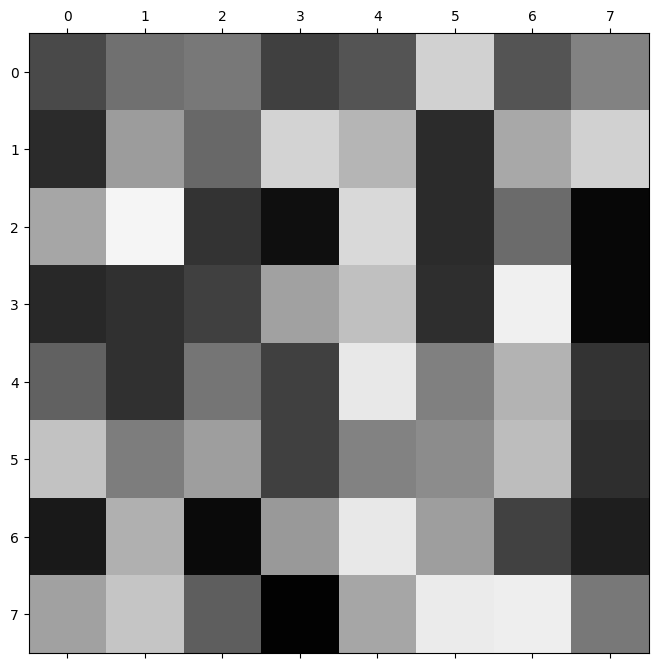

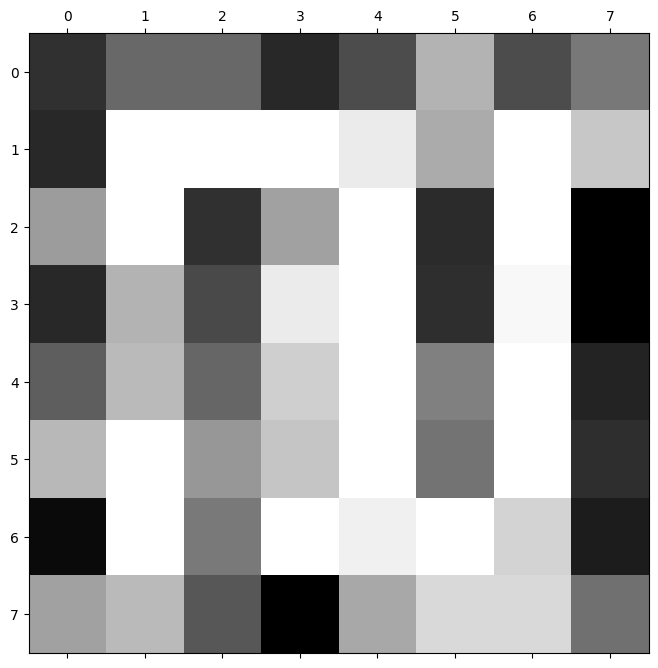

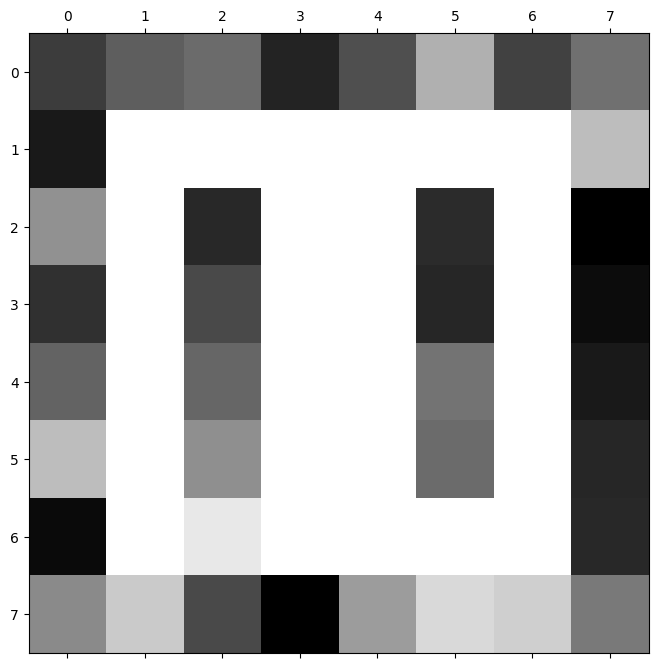

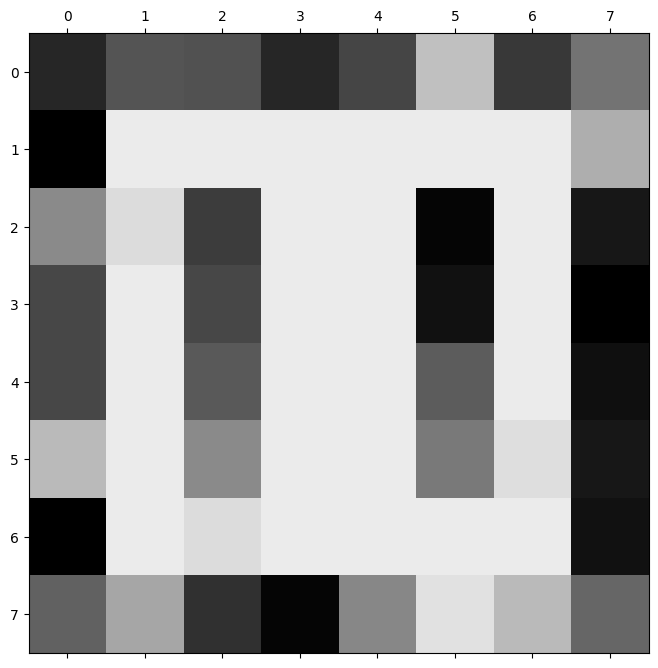

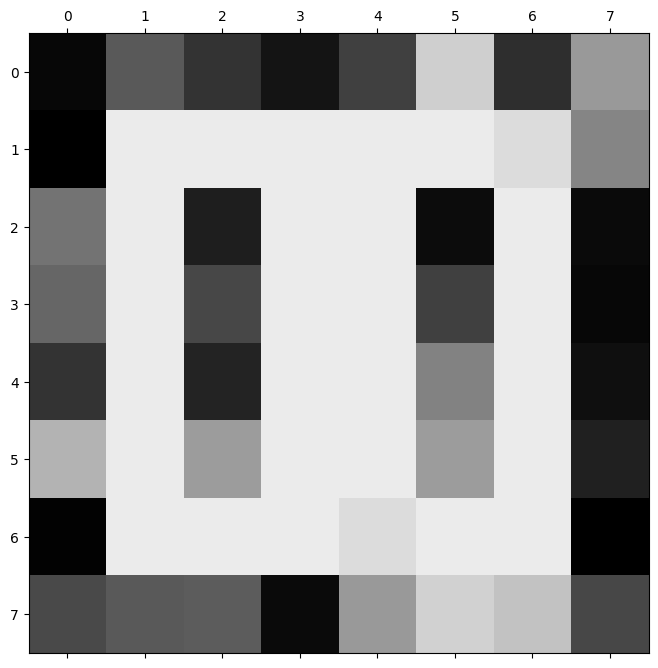

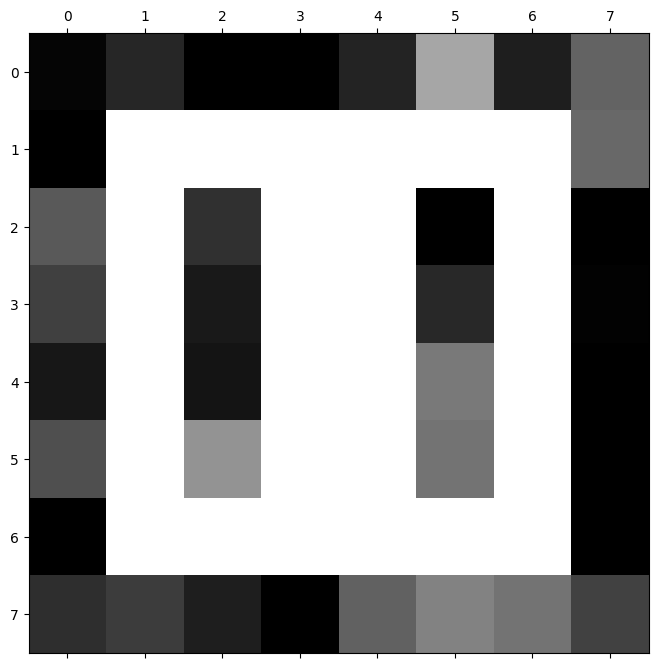

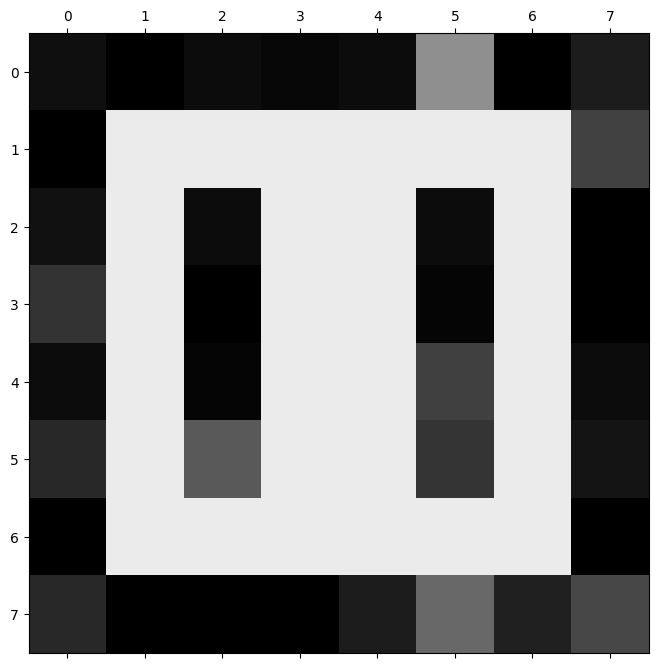

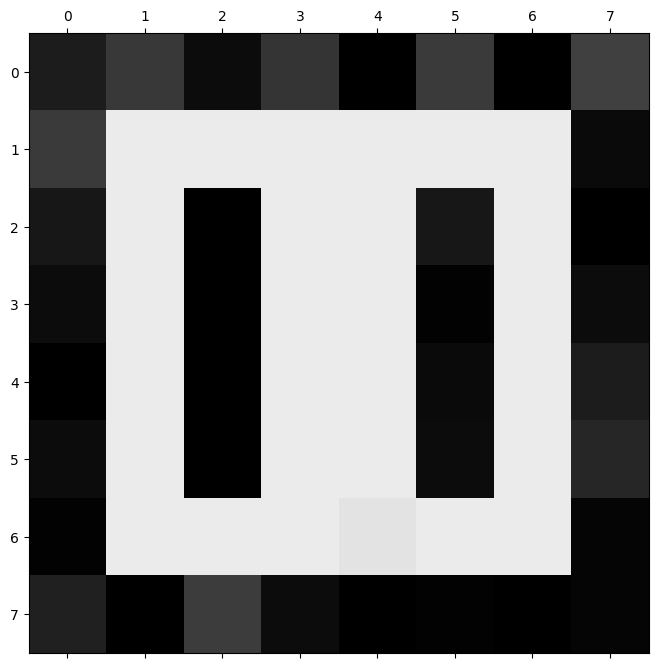

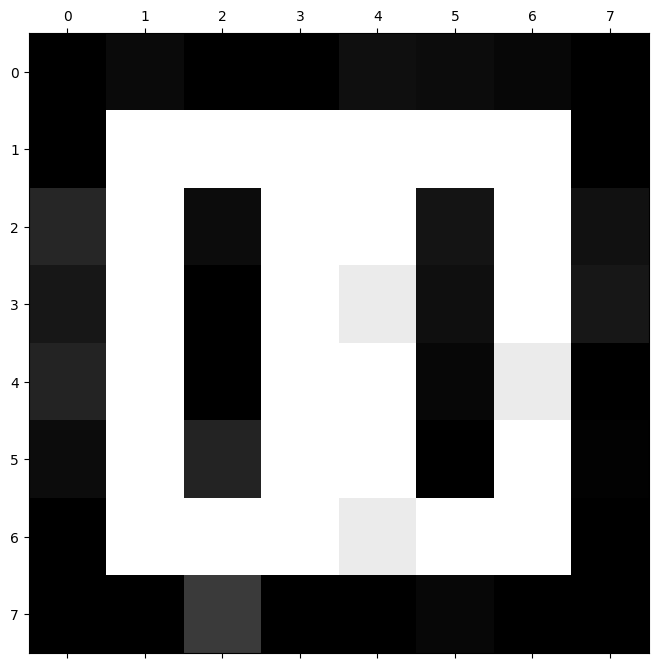

In [58]:
%%time
EPOCHS = 5051
t = 0

_v_out = []
_v_te = []
_tau = []
_epochs = []
_t = []
_v_int = []
_data = []

for i in range(EPOCHS):
    draw = np.random.choice([0, 2], 64,
              p=[0.875, 0.125])
    if np.random.choice([0, 1]) == 0:
        data = template4
        _data.append(1)
    else:
        data = draw
        _data.append(-1)
    while t <= 1e-2 * (i + 1):
        V_INT, x, TAU, V_te_tmp, V_out_tmp = solver(data, V_INT, x, TAU)
        t += DT

    _v_int.append(V_INT * 2000)
    _v_out.append(V_out_tmp)
    _v_te.append(V_te_tmp)
    _tau.append(TAU)
    _epochs.append(i)
    _t.append(t)

    if i in [0, 50, 100, 200, 400, 800, 1600, 3500, 5050]:
        test = np.round(x, 2)
        plt.matshow(test.reshape(-1, 8), cmap='gray', vmin=0, vmax=1)
        plt.savefig(f'template4/epoch-{i}.png', dpi=200)

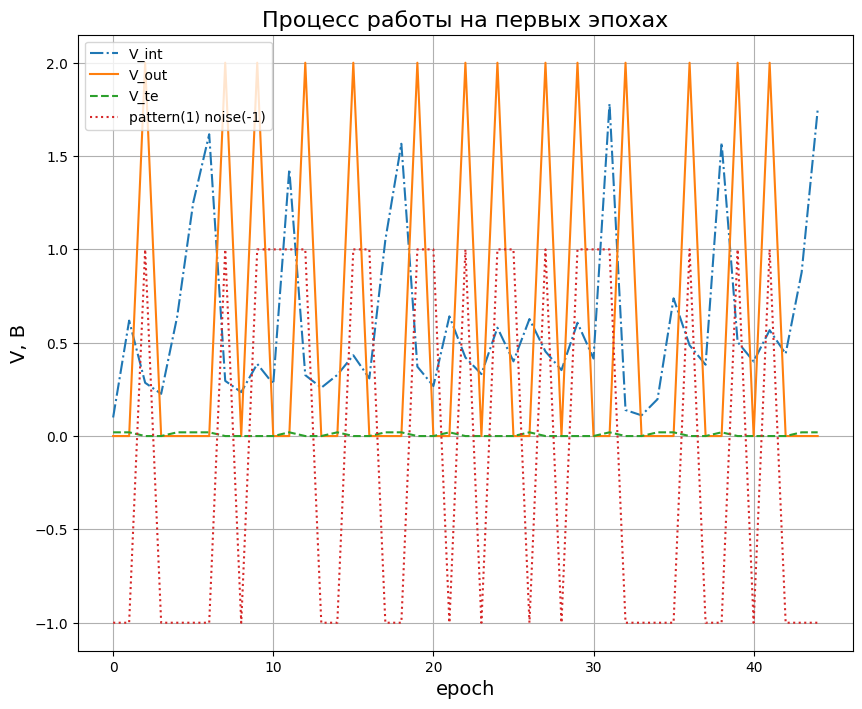

In [59]:
plt.plot(_epochs[:45], _v_int[:45], '-.')
plt.plot(_epochs[:45], _v_out[:45], '-')
plt.plot(_epochs[:45], _v_te[:45], '--')
plt.plot(_epochs[:45], _data[:45], ':')
plt.title('Процесс работы на первых эпохах', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template4/train_0_45.png', dpi=200)

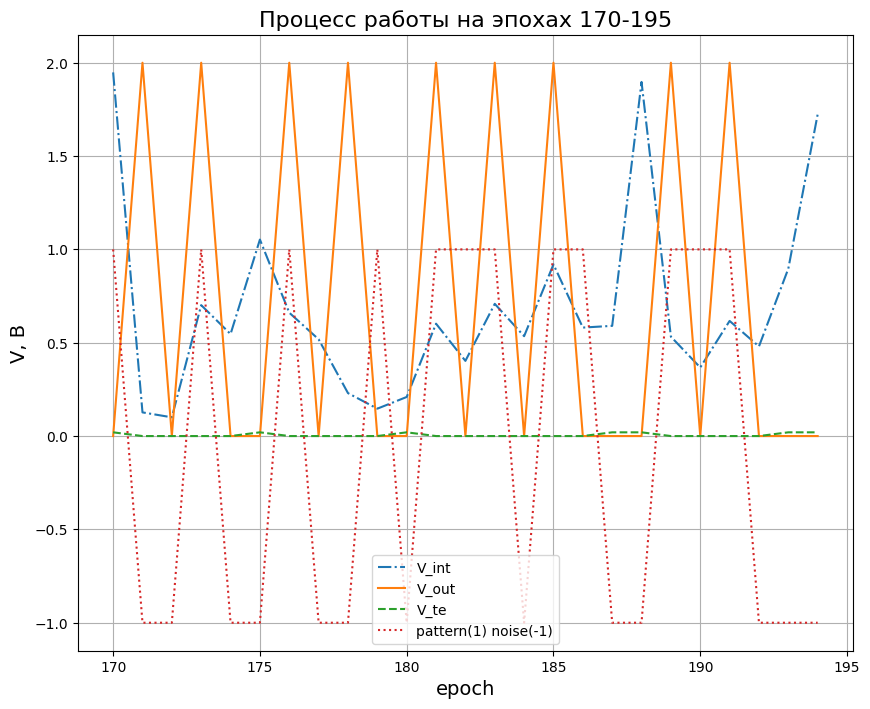

In [60]:
plt.plot(_epochs[170:195], _v_int[170:195], '-.')
plt.plot(_epochs[170:195], _v_out[170:195], '-')
plt.plot(_epochs[170:195], _v_te[170:195], '--')
plt.plot(_epochs[170:195], _data[170:195], ':')
plt.title('Процесс работы на эпохах 170-195', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template4/train_170_195.png', dpi=200)

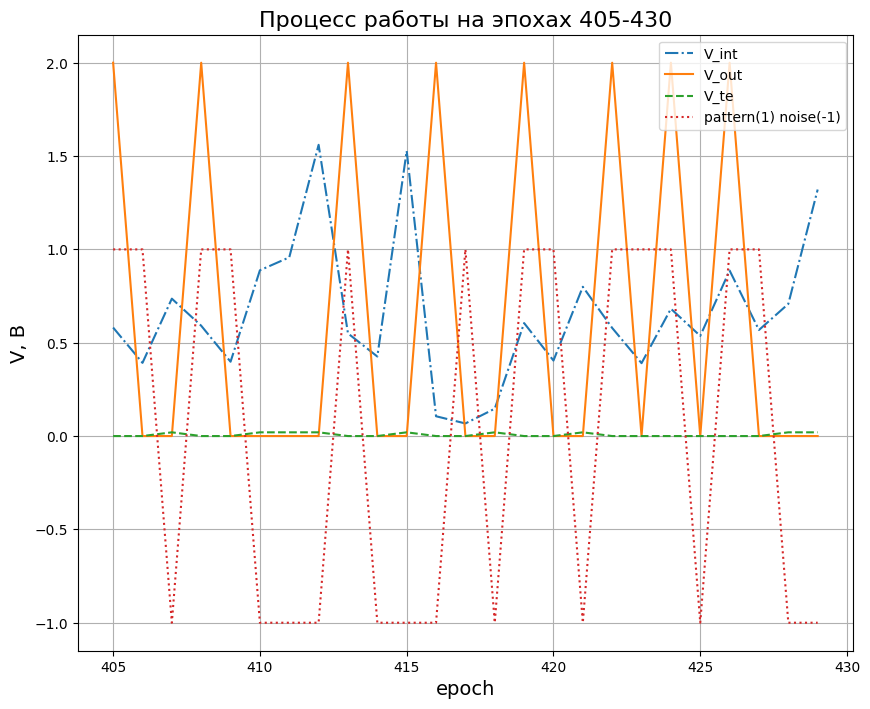

In [61]:
plt.plot(_epochs[405:430], _v_int[405:430], '-.')
plt.plot(_epochs[405:430], _v_out[405:430], '-')
plt.plot(_epochs[405:430], _v_te[405:430], '--')
plt.plot(_epochs[405:430], _data[405:430], ':')
plt.title('Процесс работы на эпохах 405-430', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template4/train_405_430.png', dpi=200)

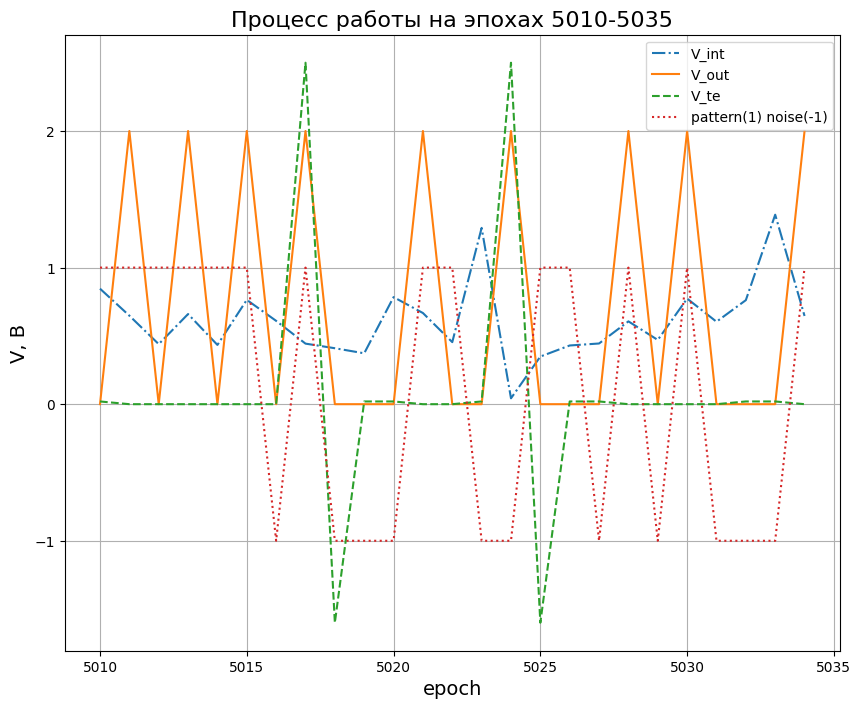

In [62]:
plt.plot(_epochs[5010:5035], _v_int[5010:5035], '-.')
plt.plot(_epochs[5010:5035], _v_out[5010:5035], '-')
plt.plot(_epochs[5010:5035], _v_te[5010:5035], '--')
plt.plot(_epochs[5010:5035], _data[5010:5035], ':')
plt.title('Процесс работы на эпохах 5010-5035', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('V, B', fontsize=14)
plt.grid()
plt.legend(['V_int', 'V_out', 'V_te', 'pattern(1) noise(-1)'])
plt.savefig('template4/train_5010_5035.png', dpi=200)